In [ ]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

In [ ]:
data = pd.read_csv('/content/5269.TW.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-14,1320.0,1335.0,1280.0,1300.0,1264.790283,965008
1,2022-06-15,1310.0,1340.0,1310.0,1320.0,1284.248535,305704
2,2022-06-16,1360.0,1370.0,1285.0,1285.0,1250.196533,438088
3,2022-06-17,1270.0,1280.0,1230.0,1265.0,1230.738281,741319
4,2022-06-20,1265.0,1270.0,1200.0,1200.0,1167.498657,620533
...,...,...,...,...,...,...,...
239,2023-06-07,1180.0,1200.0,1170.0,1185.0,1185.000000,558043
240,2023-06-08,1185.0,1185.0,1130.0,1140.0,1140.000000,506464
241,2023-06-09,1140.0,1150.0,1125.0,1125.0,1125.000000,484386
242,2023-06-12,1125.0,1155.0,1120.0,1150.0,1150.000000,366063


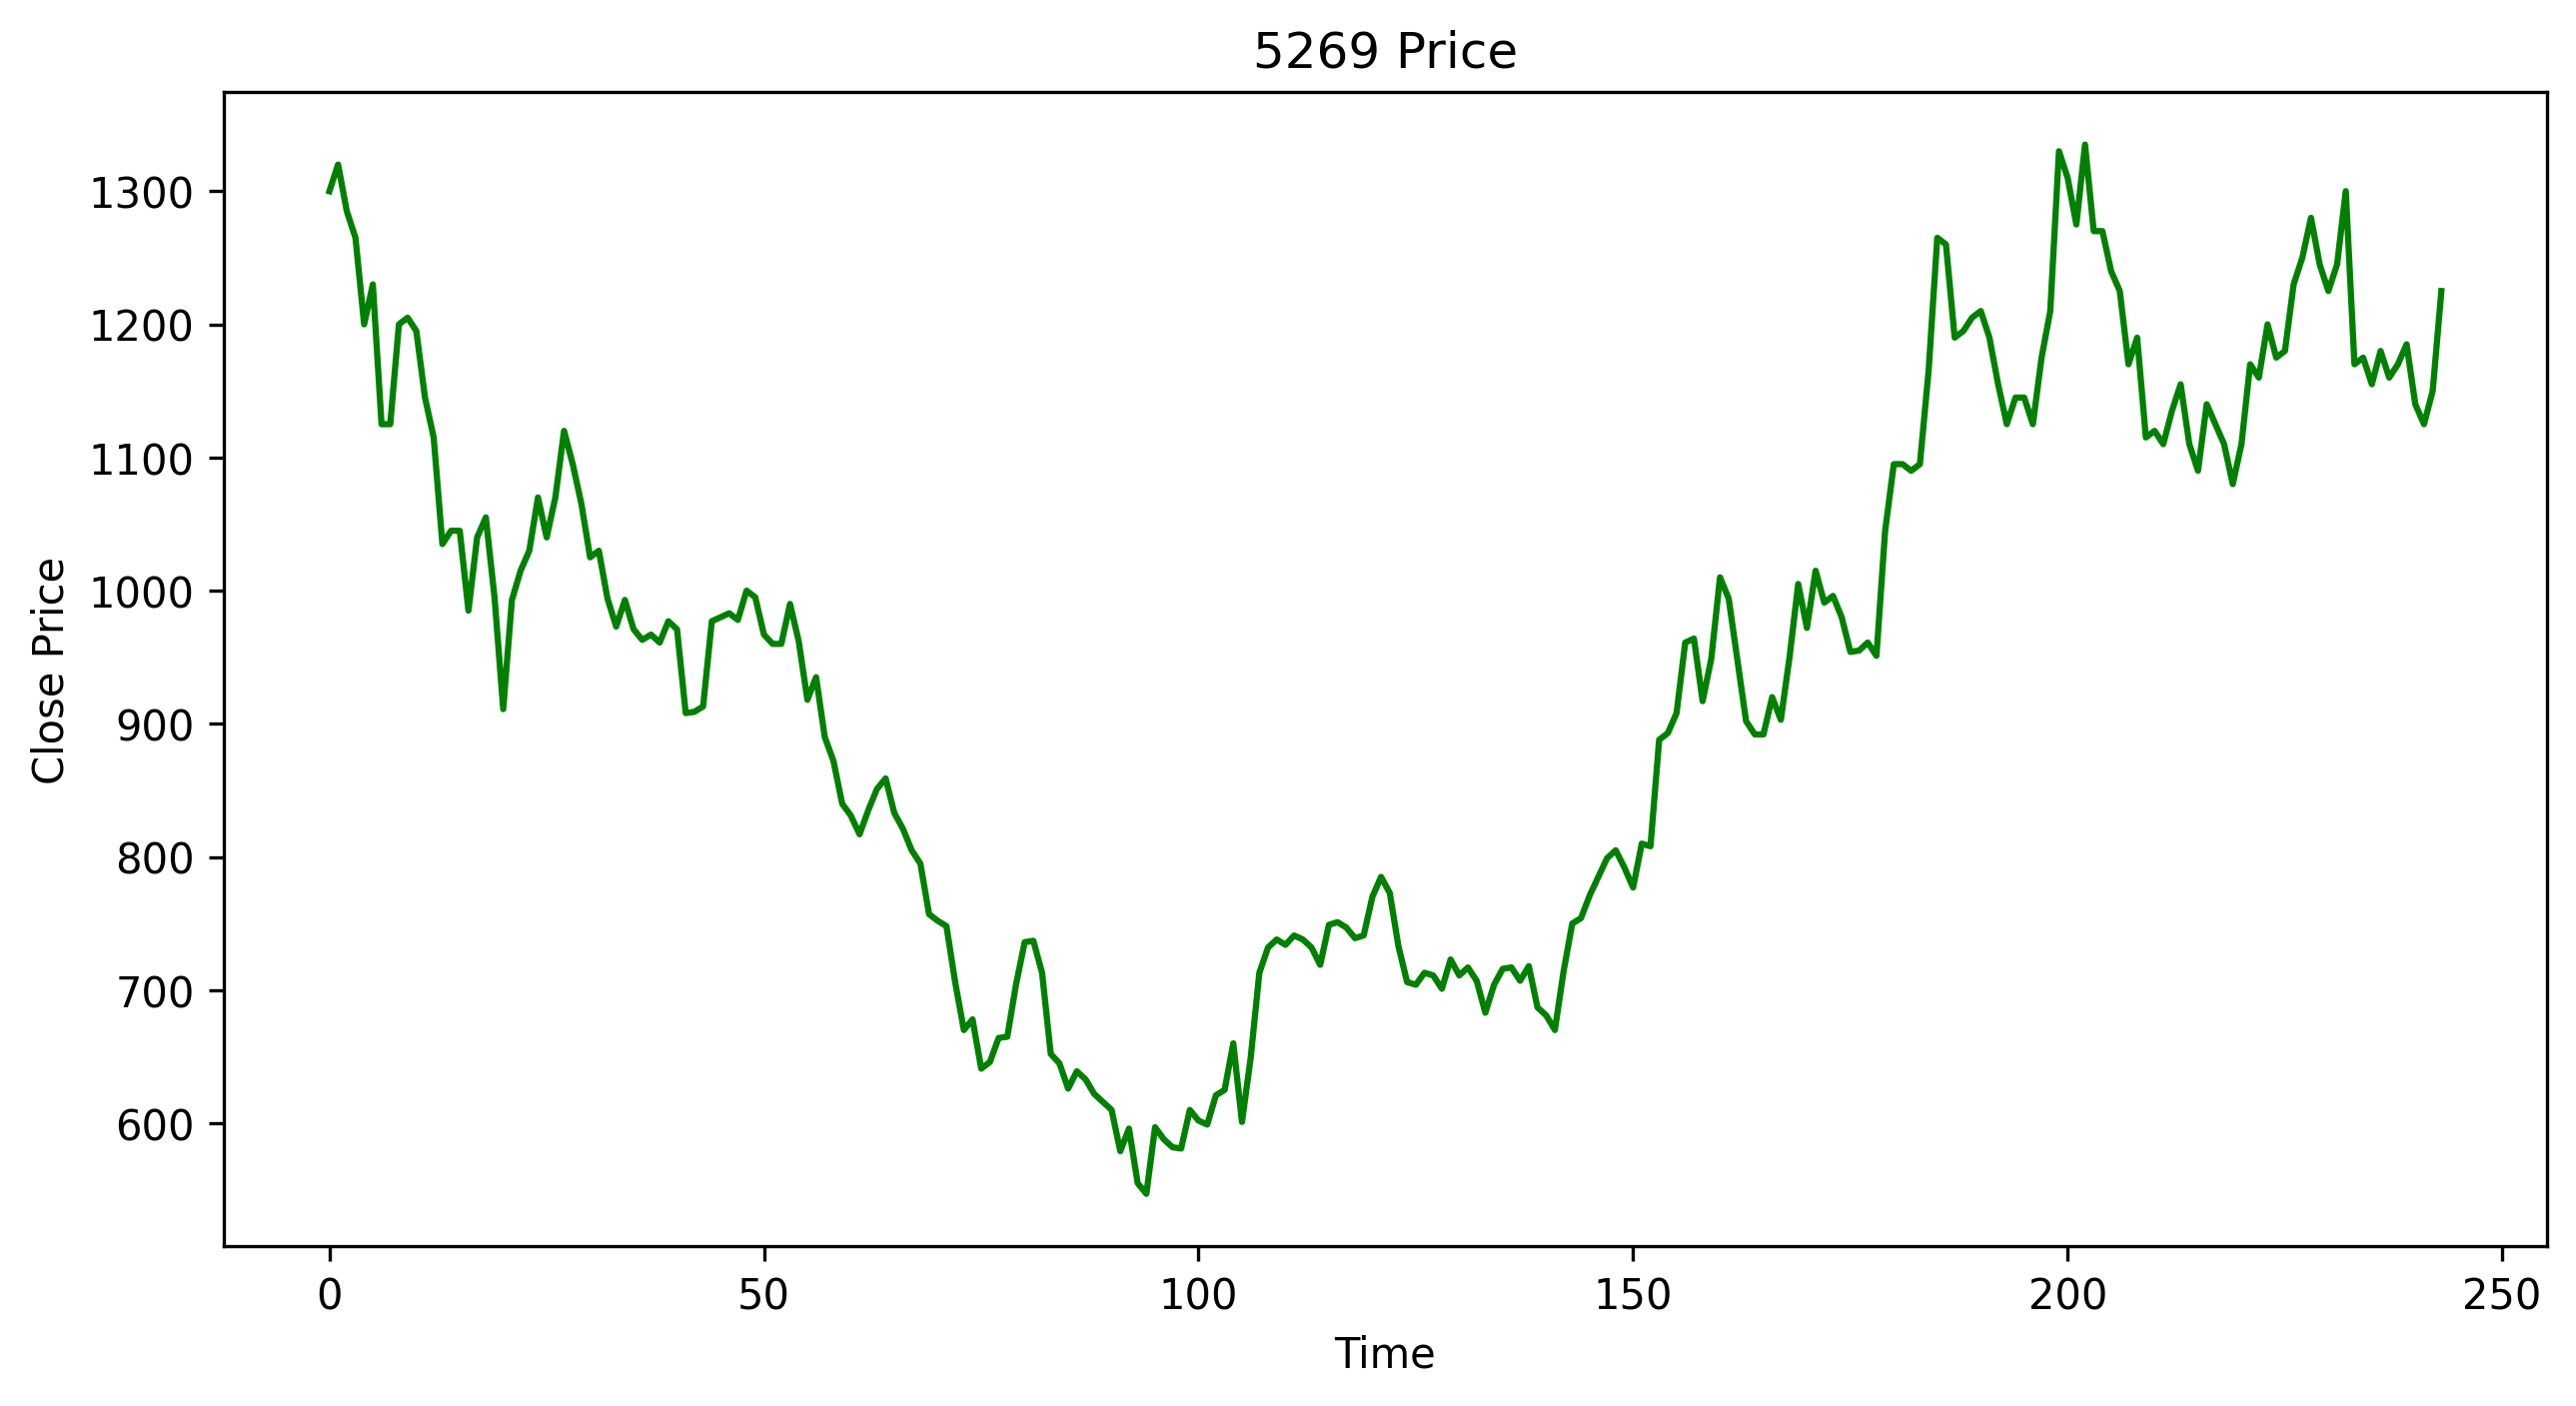

In [ ]:
data=data['Close']
plt.figure(figsize=(10,5),dpi=300)
plt.plot(data, color ='green');
plt.ylabel('Close Price')
plt.title('5269 Price')
plt.xlabel('Time')
plt.show()

In [ ]:

split =int(0.8*data.shape[0])
Train,Test  = data[0:split] , data[split:]

val_split=int(0.8*Train.shape[0])
Train,Val=Train[0:val_split] , Train[val_split:]
Val=Val.reset_index(drop=True)
Test=Test.reset_index(drop=True)

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
#需將資料做reshape的動作，使其shape為(資料長度,1)
train_set= Train.values.reshape(-1,1)
training_set_scaled = sc.fit_transform(train_set)
val_set= Val.values.reshape(-1,1)
val_set_scaled = sc.transform(val_set)
test_set = Test.values.reshape(-1,1)
test_set_scaled = sc.transform(test_set)

X_train = []
y_train = []
for i in range(5,len(train_set)):
    X_train.append(training_set_scaled[i-5:i])
    y_train.append(training_set_scaled[i])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

X_val = []
y_val = []
for i in range(5,len(val_set)):
    X_val.append(val_set_scaled[i-5:i])
    y_val.append(val_set_scaled[i])
X_val, y_val = np.array(X_val), np.array(y_val)
X_val = np.reshape(X_val,(X_val.shape[0], X_val.shape[1], 1))

X_test = []
y_test = []
for i in range(5,len(test_set)):
    X_test.append(test_set_scaled[i-5:i])
    y_test.append(test_set_scaled[i])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_train[0]

array([[0.97412678],
       [1.        ],
       [0.95472186],
       [0.92884864],
       [0.84476067]])

In [ ]:
keras.backend.clear_session()
model = keras.models.Sequential([
    GRU(32, input_shape=(X_train.shape[1], 1)),
    Dropout (0.05),
    Dense(1)
])
opt=Adam(learning_rate=0.5,beta_1=0.95)
model.compile(optimizer=opt, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                3360      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32,validation_data=(X_val,y_val))

Epoch 1/100
5/5 [==============================] - 3s 134ms/step - loss: 45.5770 - val_loss: 14.1588
Epoch 2/100
5/5 [==============================] - 0s 17ms/step - loss: 23.8560 - val_loss: 24.0381
Epoch 3/100
5/5 [==============================] - 0s 17ms/step - loss: 15.3475 - val_loss: 8.5363
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 4.1603 - val_loss: 1.3723
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 4.9848 - val_loss: 3.0450
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 4.5552 - val_loss: 1.7203
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 4.8095 - val_loss: 1.9880
Epoch 8/100
5/5 [==============================] - 0s 12ms/step - loss: 4.4261 - val_loss: 2.1877
Epoch 9/100
5/5 [==============================] - 0s 13ms/step - loss: 4.5237 - val_loss: 0.7249
Epoch 10/100
5/5 [==============================] - 0s 13ms/step - loss: 5.0949 - val_loss: 2.0439
Epoch 11/100


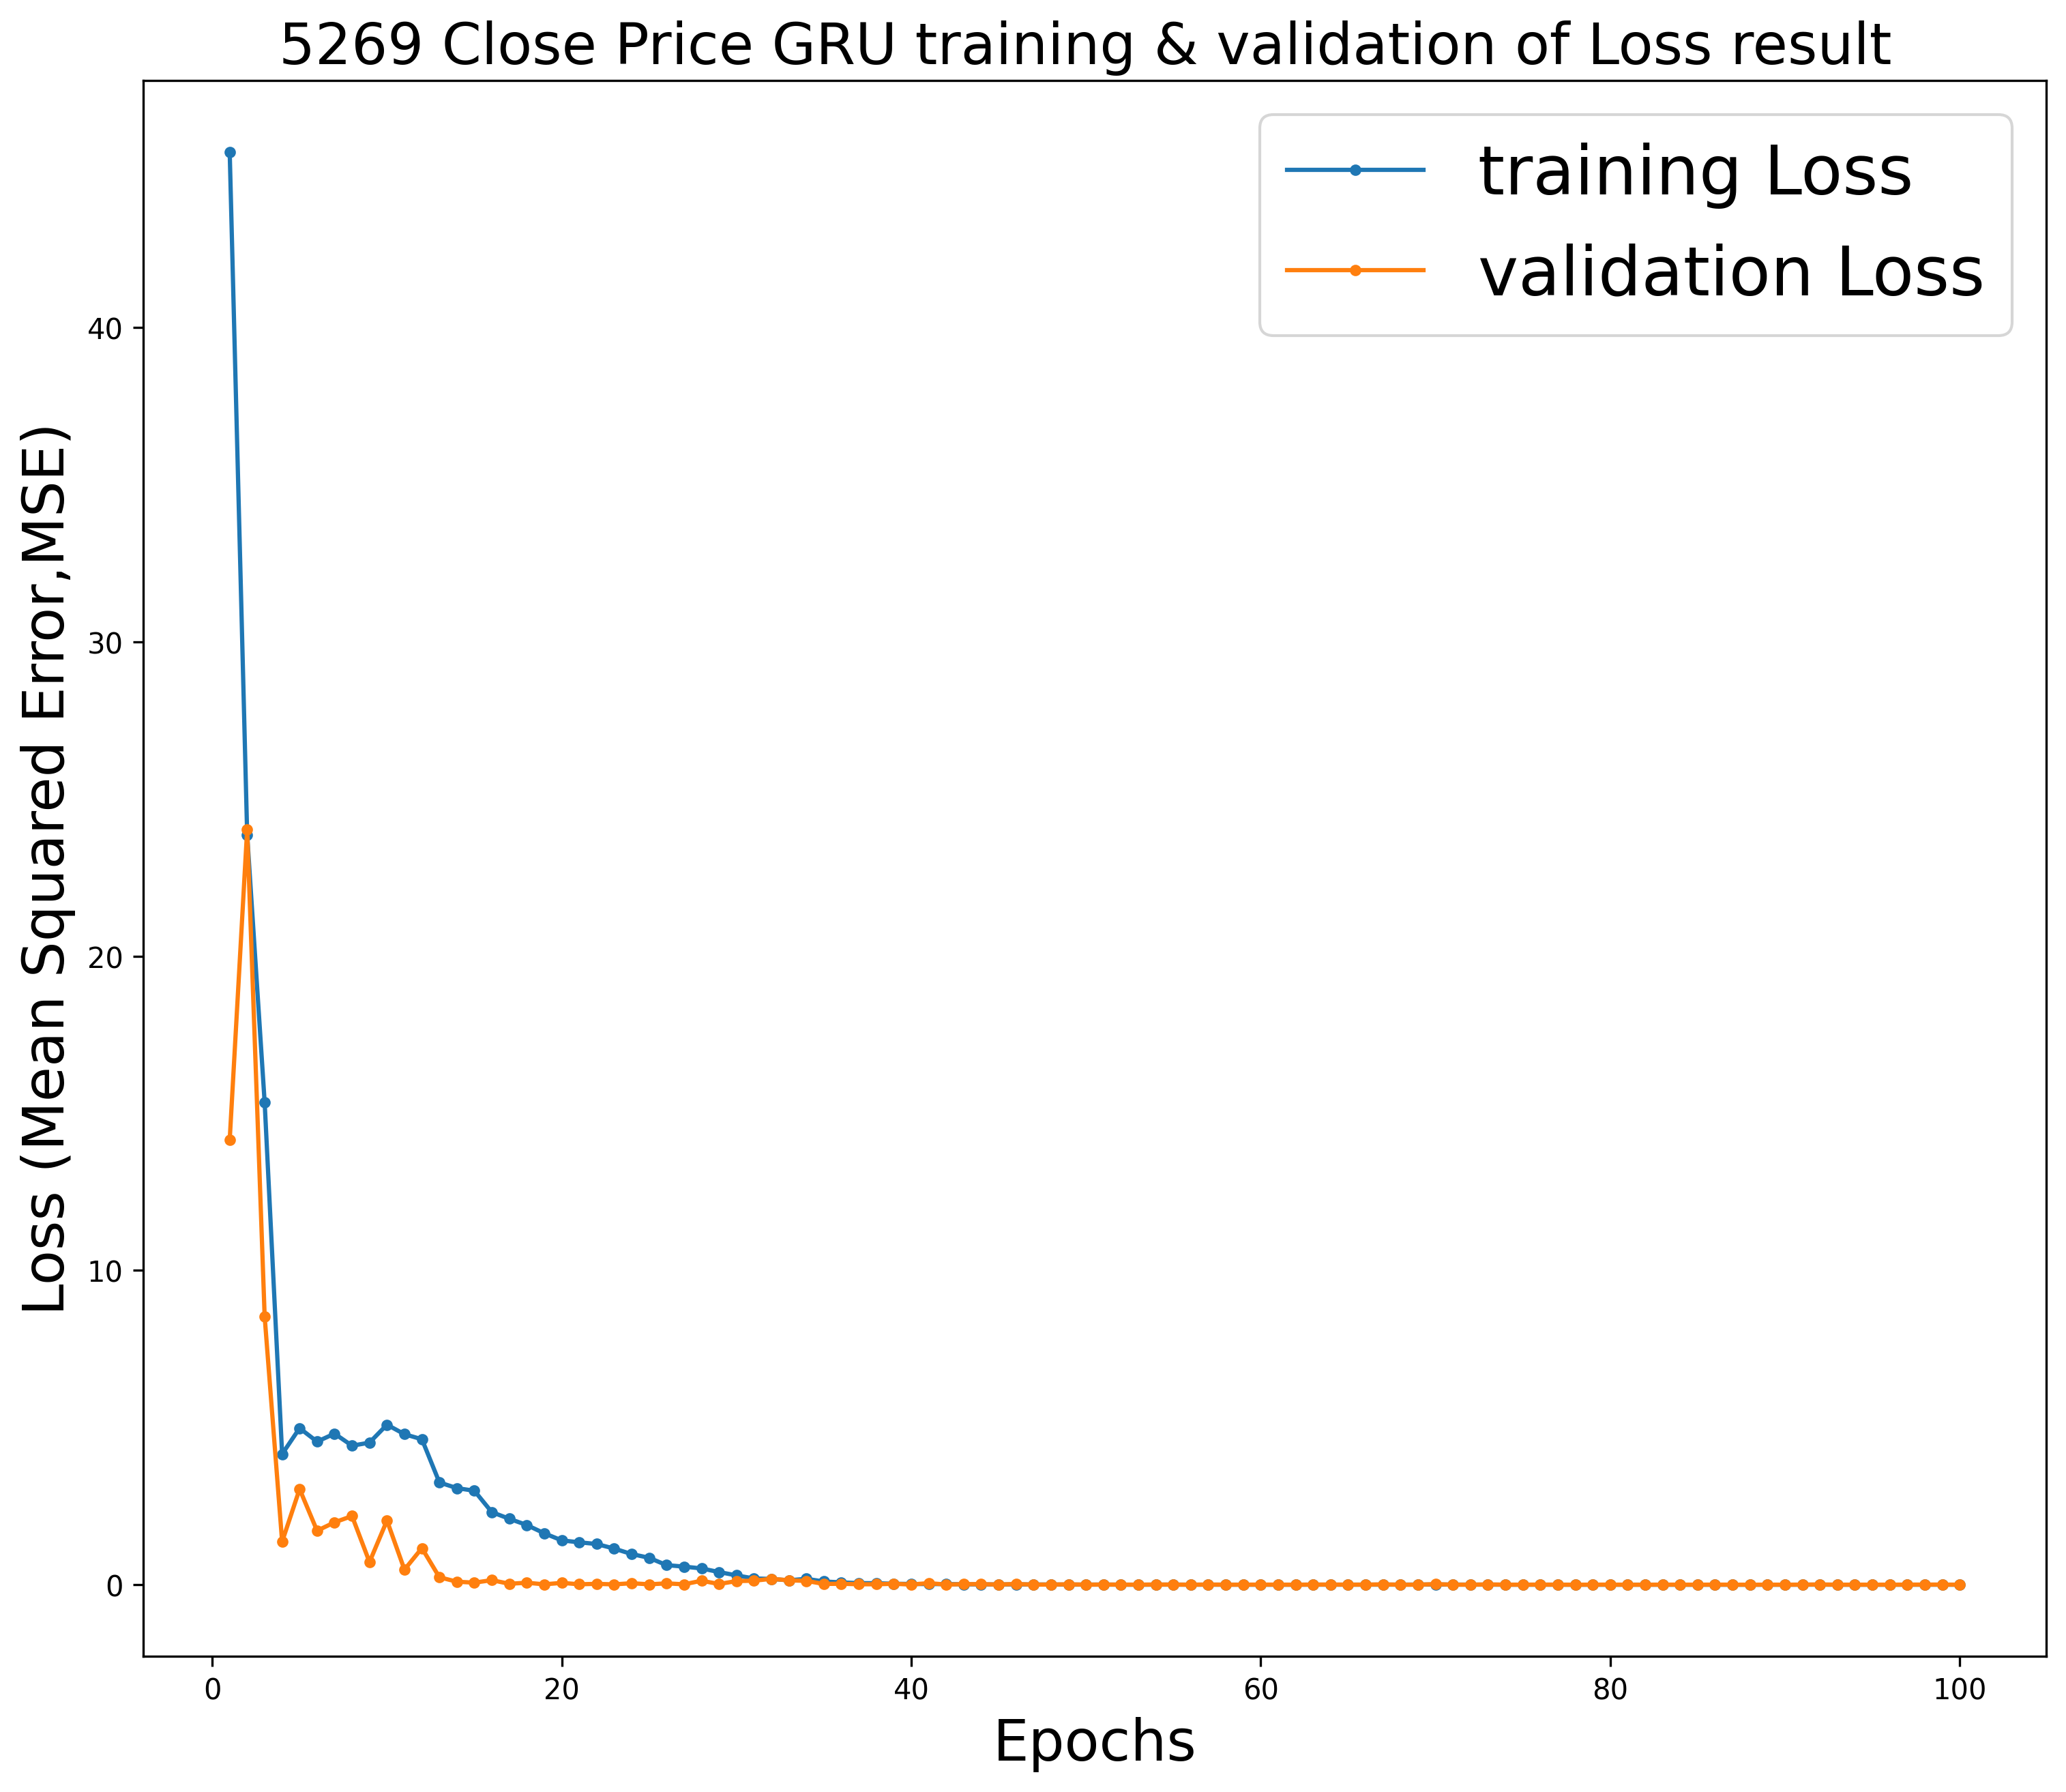

In [ ]:
modeling_result=history.history
modeling_result.keys()
#Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Mean Squared Error,MSE)',fontsize=20)
plt.title('5269 Close Price GRU training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [ ]:

predicted_price = model.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_price = sc.inverse_transform(predicted_price)
actual_price = sc.inverse_transform(y_test)

2/2 [==============================] - 0s 10ms/step


In [ ]:
df1 = pd.DataFrame(predicted_price)
df2 = pd.DataFrame(actual_price)

df1.columns = ['Pred']
df2.columns = ['Actual']

merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv('output.csv', index=False)

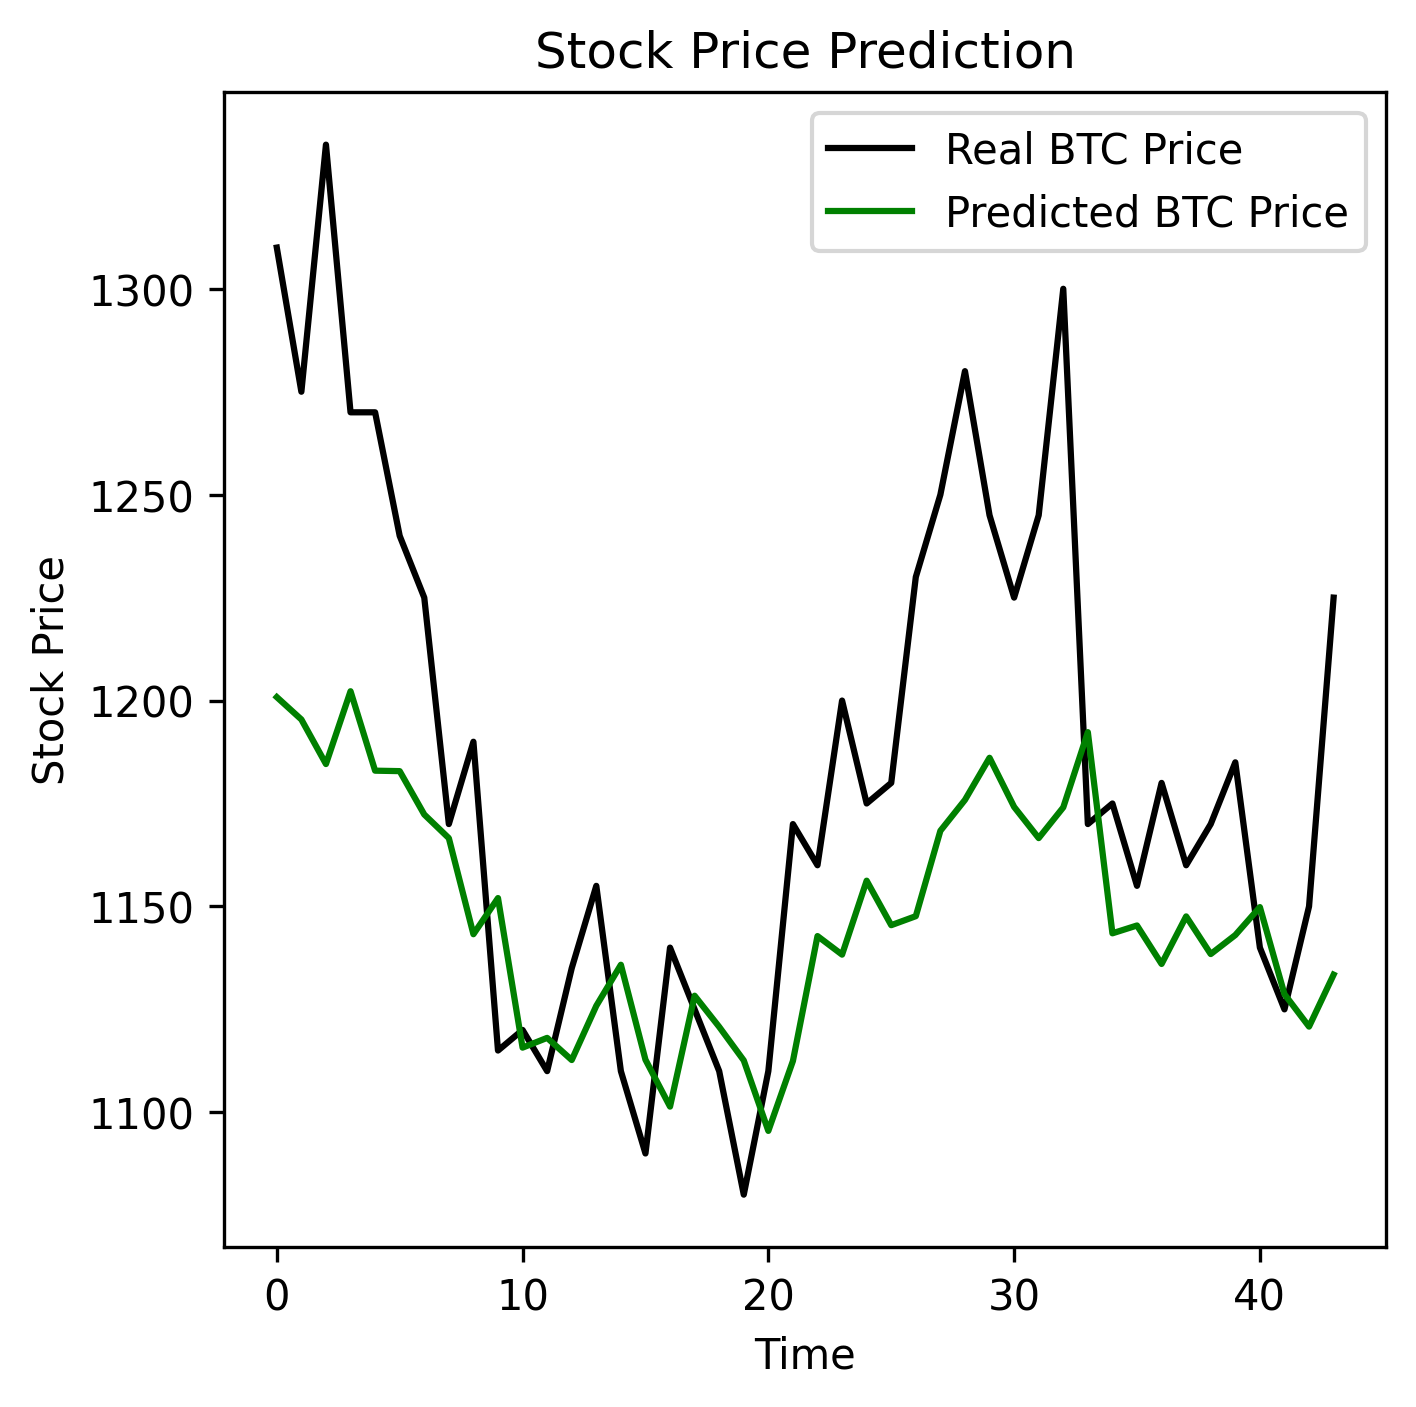

In [ ]:
plt.figure(figsize=(5,5),dpi=300)
plt.plot(actual_price, color = 'black', label = 'Real BTC Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted BTC Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE

# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator

    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE
predicted_price
actual_price

MAE=mean_absolute_error(actual_price,predicted_price)
MSE=mean_squared_error(actual_price,predicted_price,squared=True)
RMSE=mean_squared_error(actual_price,predicted_price,squared=False)
MAPE=mean_absolute_percentage_error(actual_price,predicted_price)
SMAPE=SMAPE_calulate(actual_price,predicted_price)
RAE=RAE_calculate(actual_price,predicted_price)
MRAE=MRAE_calculate(actual_price,predicted_price)
MdRAE=MdRAE_calculate(actual_price,predicted_price)
RSE=RSE_calculate(actual_price,predicted_price,Root=False)
RRSE=RSE_calculate(actual_price,predicted_price,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 45.518
MSE: 3300.983
RMSE: 57.454
MAPE: 3.714 %
SMAPE: 3.815 %
RAE: 0.867
MRAE: 0.01971242348978838
MdRAE: 0.97 bench: 1185.909
RSE: 0.829
RRSE: 0.91
